In [88]:
# importing neccessery libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import holidays

In [89]:
df_hourly = pd.read_csv("Data_raw\CBS_2021-2023_Hourly_Weather.csv",sep = ",")
df_hourly.columns = df_hourly.columns.str.lower()
df_hourly.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Leon\AppData\Local\Temp\ipykernel_16200\2672129770.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_hourly = pd.read_csv("Data_raw\CBS_2021-2023_Hourly_Weather.csv",sep = ",")


,casual,date,hour,member,total_rides,relativehumidity_2m (%),temperature_2m (°c),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
5,11.0,2021-01-01,5,3.0,14.0,75,1.4,2,8.7
6,8.0,2021-01-01,6,18.0,26.0,72,1.4,2,8.9
7,10.0,2021-01-01,7,17.0,27.0,71,1.4,3,7.9
8,22.0,2021-01-01,8,33.0,55.0,71,1.4,3,7.1
9,22.0,2021-01-01,9,54.0,76.0,70,1.6,3,7.2


In [90]:
df_hourly.dtypes
#change Date to datetime
#change hour to datetime -hour
#change weather code to categorical 


#

casual                     float64
date                        object
hour                         int64
member                     float64
total_rides                float64
relativehumidity_2m (%)      int64
temperature_2m (°c)        float64
weathercode (wmo code)       int64
windspeed_10m (km/h)       float64
dtype: object

In [91]:
df_hourly

,casual,date,hour,member,total_rides,relativehumidity_2m (%),temperature_2m (°c),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7


In [92]:
#Making a column to categorize weather as cold or warm
df_hourly["warm_or_cold"] = df_hourly["temperature_2m (°c)"].apply(lambda value: "cold"
                                                                if value <= 5 else "temperate"
                                                                if value <= 15 else "warm"
                                                                ) 

df_hourly["warm_or_cold"] = pd.Categorical(df_hourly["warm_or_cold"], categories = ["cold","temperate","warm"])


df_hourly.head(5)

,casual,date,hour,member,total_rides,relativehumidity_2m (%),temperature_2m (°c),weathercode (wmo code),windspeed_10m (km/h),warm_or_cold
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,cold
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,cold
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,cold
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,cold
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,cold


In [93]:
df_hourly['date'] = pd.to_datetime(df_hourly['date'])
# extract weekdays using dt.day_name()
df_hourly['weekday_name'] = df_hourly['date'].dt.day_name()

#Convert weather code 
df_hourly['weathercode (wmo code)'] = df_hourly['weathercode (wmo code)'].astype('category')

df_hourly.dtypes

casual                            float64
date                       datetime64[ns]
hour                                int64
member                            float64
total_rides                       float64
relativehumidity_2m (%)             int64
temperature_2m (°c)               float64
weathercode (wmo code)           category
windspeed_10m (km/h)              float64
warm_or_cold                     category
weekday_name                       object
dtype: object

In [94]:
#Making a column to categorize time of day
df_hourly["daytime"] = df_hourly['hour'].apply(lambda value: "morning"
                                                                if value <= 6 else "morning_rush"
                                                                if value <= 10 else "midday"
                                                                if value <= 15 else "afternoon_rush"
                                                                if value <= 19 else "evening") 



#dfwhite["quality_label"] = pd.Categorical(dfwhite["quality_label"], categories = ["poor","low","medium","high","exceptional"])
df_hourly["daytime"] = pd.Categorical(df_hourly["daytime"], categories = ["morning","morning_rush","midday","afternoon_rush","evening"])


df_hourly.head(5)

,casual,date,hour,member,total_rides,relativehumidity_2m (%),temperature_2m (°c),weathercode (wmo code),windspeed_10m (km/h),warm_or_cold,weekday_name,daytime
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,cold,Friday,morning
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,cold,Friday,morning
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,cold,Friday,morning
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,cold,Friday,morning
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,cold,Friday,morning


In [95]:
#Make a column for the percentage of ratio of members to casual users on that day

df_hourly["percentage_members_vs_casuals(%)"] = round((df_hourly["member"]/(df_hourly["casual"] + df_hourly["member"]))*100,2)

df_hourly

,casual,date,hour,member,total_rides,relativehumidity_2m (%),temperature_2m (°c),weathercode (wmo code),windspeed_10m (km/h),warm_or_cold,weekday_name,daytime,percentage_members_vs_casuals(%)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,cold,Friday,morning,56.52
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,cold,Friday,morning,50.00
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,cold,Friday,morning,58.33
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,cold,Friday,morning,43.75
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,cold,Friday,morning,41.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3,cold,Sunday,afternoon_rush,59.01
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7,cold,Sunday,evening,60.82
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0,cold,Sunday,evening,61.99
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7,cold,Sunday,evening,63.11


In [96]:
# Checking for NULLs in the data
#df_hourly.isnull().sum()

#has null data:
#Casual: 11
#Member: 11
#Total_rides: 11

#could drop nulls
#df_hourly_noNa = df_hourly.dropna(axis=0)


#or fill nulls with interpolate 
df_hourly["casual"] = df_hourly["casual"].interpolate(method="linear")

df_hourly["member"] = df_hourly["member"].interpolate(method="linear")

df_hourly["total_rides"] = df_hourly["total_rides"].interpolate(method="linear")

#df_hourly_noNa.isnull().sum()
df_hourly.isnull().sum()

casual                               0
date                                 0
hour                                 0
member                               0
total_rides                          0
relativehumidity_2m (%)              0
temperature_2m (°c)                  0
weathercode (wmo code)               0
windspeed_10m (km/h)                 0
warm_or_cold                         0
weekday_name                         0
daytime                              0
percentage_members_vs_casuals(%)    11
dtype: int64

In [97]:
df_hourly.tail(10)

,casual,date,hour,member,total_rides,relativehumidity_2m (%),temperature_2m (°c),weathercode (wmo code),windspeed_10m (km/h),warm_or_cold,weekday_name,daytime,percentage_members_vs_casuals(%)
26270,286.0,2023-12-31,14,400.0,686.0,60,-5.3,0,1.5,cold,Sunday,midday,58.31
26271,249.0,2023-12-31,15,400.0,649.0,64,-6.4,0,4.1,cold,Sunday,midday,61.63
26272,250.0,2023-12-31,16,390.0,640.0,69,-7.3,0,4.3,cold,Sunday,afternoon_rush,60.94
26273,206.0,2023-12-31,17,296.0,502.0,68,-7.0,0,3.3,cold,Sunday,afternoon_rush,58.96
26274,150.0,2023-12-31,18,220.0,370.0,69,-7.4,0,3.1,cold,Sunday,afternoon_rush,59.46
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3,cold,Sunday,afternoon_rush,59.01
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7,cold,Sunday,evening,60.82
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0,cold,Sunday,evening,61.99
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7,cold,Sunday,evening,63.11
26279,82.0,2023-12-31,23,106.0,188.0,73,-8.5,0,3.7,cold,Sunday,evening,56.38


In [98]:
df_hourly.duplicated().sum()
#no duplicates (strictly)


0

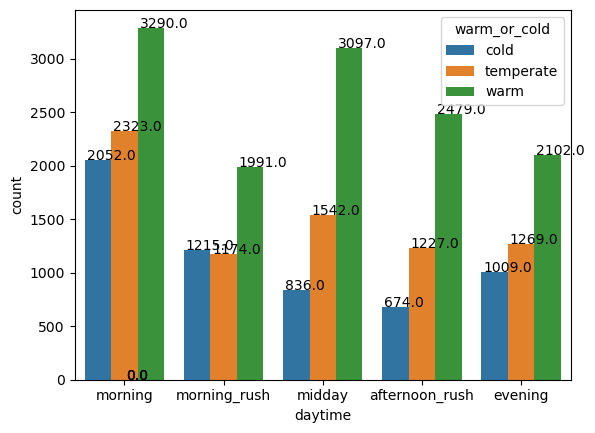

In [99]:
#Count plot to data instances at different times of day (to compare rush hours with other day times)

###hypothesis: different amount of rides taken at different times of day (and weathers)
ax = sns.countplot(data=df_hourly, x="daytime", hue="warm_or_cold")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.02, p.get_height()+0.25))

<Axes: xlabel='daytime', ylabel='total_rides'>

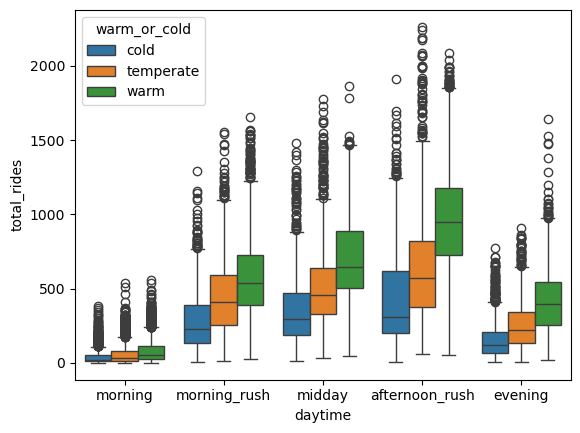

In [100]:
#boxplot the alcohol level, hue the wine type and make a p value calculation for the trend

###Hypothesis: there will be a signifcant difference between the amount of total rides occuring at different times of day and in different weather conditions 
sns.boxplot(data=df_hourly, x="daytime", y="total_rides", hue="warm_or_cold")

<Axes: xlabel='daytime', ylabel='member'>

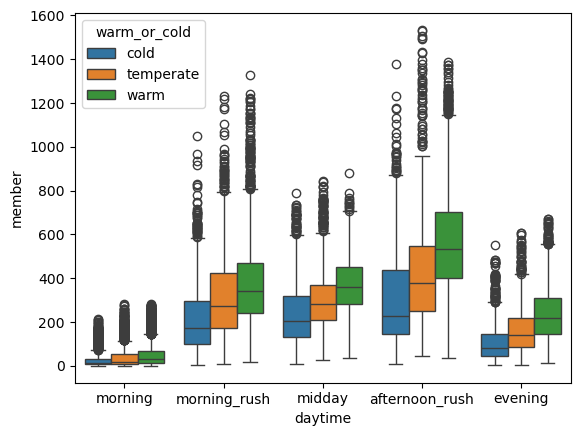

In [101]:
#Members vs Casual users on different times of day 

sns.boxplot(data=df_hourly, x="daytime", y="member", hue="warm_or_cold")



<Axes: xlabel='daytime', ylabel='casual'>

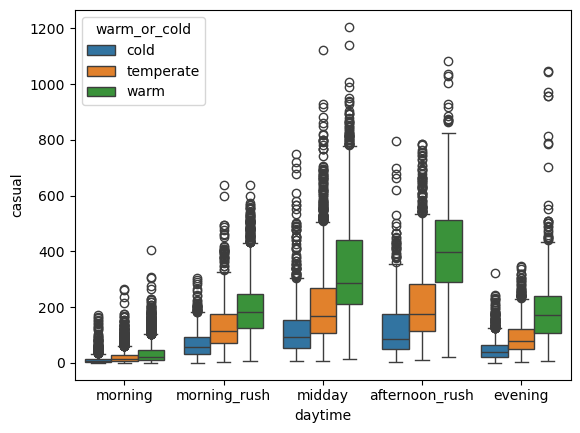

In [102]:
sns.boxplot(data=df_hourly, x="daytime", y="casual", hue="warm_or_cold")

<Axes: xlabel='casual', ylabel='member'>

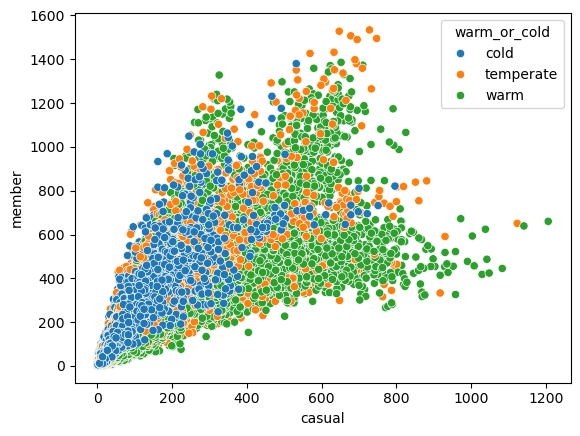

In [103]:
sns.scatterplot(df_hourly, x="casual", y="member",hue="warm_or_cold")

<Axes: xlabel='warm_or_cold', ylabel='casual'>

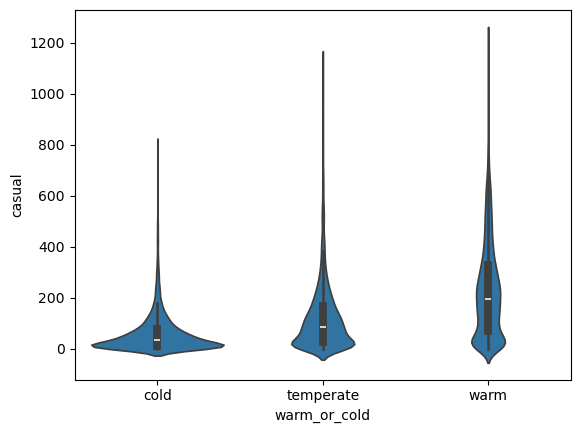

In [104]:
sns.violinplot(y="casual", x="warm_or_cold", data=df_hourly)

In [105]:
filtered_df21 = df_hourly[df_hourly['date'].dt.year == 2021]
filtered_df22 = df_hourly[df_hourly['date'].dt.year == 2022]
filtered_df23 = df_hourly[df_hourly['date'].dt.year == 2023]

filtered_df23.value_counts().sum()

8759

In [106]:
df_hourly["month"] = df_hourly["date"].dt.month

#Making a column to categorize time of day
df_hourly["season"] = df_hourly['month'].apply(lambda value: "winter"
                                                                if value <= 3 else "spring"
                                                                if value <= 5 else "summer"
                                                                if value <= 9 else "fall"
                                                                if value <= 11 else "winter") 


In [107]:
us_holidays = holidays.US()
df_hourly['is_holiday'] = df_hourly['date'].map(lambda x: x in us_holidays)

In [108]:
df_hourly.head(5)

,casual,date,hour,member,total_rides,relativehumidity_2m (%),temperature_2m (°c),weathercode (wmo code),windspeed_10m (km/h),warm_or_cold,weekday_name,daytime,percentage_members_vs_casuals(%),month,season,is_holiday
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,cold,Friday,morning,56.52,1,winter,True
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,cold,Friday,morning,50.00,1,winter,True
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,cold,Friday,morning,58.33,1,winter,True
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,cold,Friday,morning,43.75,1,winter,True
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,cold,Friday,morning,41.67,1,winter,True


In [109]:

df_hourly["percentage_members_vs_casuals(%)"] = round((df_hourly["member"]/(df_hourly["casual"] + df_hourly["member"]))*100,2)


In [110]:
uniques = df_hourly["weathercode (wmo code)"].unique()

#print(len(uniques))
indices = np.argsort(uniques)
ordered_arr = uniques[indices]

for elements in ordered_arr:
    print(elements)

code_map = {
0:"Cloud development not observed or not observable",                  
1:"Cloud generally dissolving or becoming less developed",                  
2:"State of sky on the whole unchanged",                                
3:"Clouds generally forming or developing",
51:"Drizzle, not freezing, continuous, slight at time of ob.",
53:"Drizzle, not freezing, continuous, moderate at time of ob.",                           
55:"Drizzle, not freezing, continuous, heavy at time of ob.",
61:"Rain, not freezing, continuous, slight at time of ob.",                                  
63:"Rain, not freezing, continuous, moderate at time of ob.",                
65:"Rain, not freezing, continuous, heavy at time of ob.",
71:"Continuous fall of snowflakes, slight at time of ob.",
73:"Continuous fall of snowflakes, moderate at time of ob.",
75:"Continuous fall of snowflakes, heavy at time of ob."}

weather_type_map = {
0:"Sunny",                  
1:"Sunny",                  
2:"Sunny",                                
3:"Cloudy",
51:"Drizzle",
53:"Drizzle",                           
55:"Drizzle",
61:"Rain",                                  
63:"Rain",                
65:"Rain",
71:"Snow",
73:"Snow",
75:"Snow"}


df_hourly['weather_description'] = df_hourly['weathercode (wmo code)'].map(code_map)


df_hourly["weather_type"] = df_hourly['weathercode (wmo code)'].map(weather_type_map)
df_hourly.head()

0
1
2
3
51
53
55
61
63
65
71
73
75


,casual,date,hour,member,total_rides,relativehumidity_2m (%),temperature_2m (°c),weathercode (wmo code),windspeed_10m (km/h),warm_or_cold,weekday_name,daytime,percentage_members_vs_casuals(%),month,season,is_holiday,weather_description,weather_type
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,cold,Friday,morning,56.52,1,winter,True,Cloud generally dissolving or becoming less de...,Sunny
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,cold,Friday,morning,50.00,1,winter,True,Cloud generally dissolving or becoming less de...,Sunny
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,cold,Friday,morning,58.33,1,winter,True,State of sky on the whole unchanged,Sunny
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,cold,Friday,morning,43.75,1,winter,True,State of sky on the whole unchanged,Sunny
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,cold,Friday,morning,41.67,1,winter,True,State of sky on the whole unchanged,Sunny


<Axes: xlabel='date', ylabel='total_rides'>

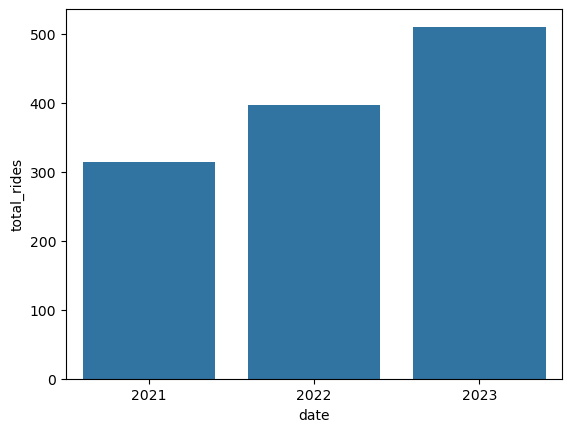

In [111]:

# Concatenate the dataframes
# group by year and calculate aggregate values (e.g., mean, sum)
yearly_data = df_hourly.groupby(df_hourly['date'].dt.year)["total_rides"].mean()

yearly_data.head()
#yearly_data.plot()
#plt.show()

sns.barplot(yearly_data)

C:\Users\Leon\AppData\Local\Temp\ipykernel_16200\3849178546.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rides_throughout_day = df_hourly.groupby(df_hourly["daytime"])["total_rides"].mean()


<Axes: xlabel='daytime', ylabel='total_rides'>

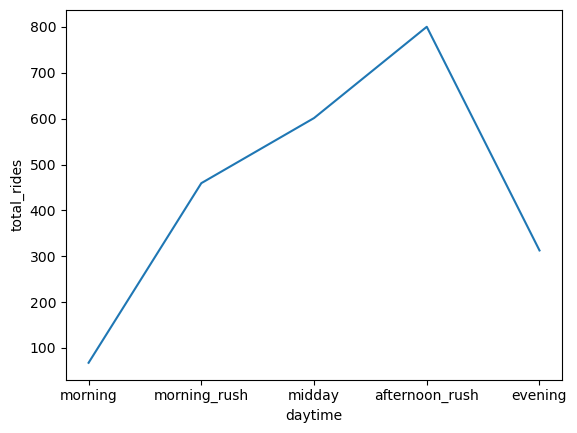

In [112]:
# group by year and calculate aggregate values (e.g., mean, sum)
rides_throughout_day = df_hourly.groupby(df_hourly["daytime"])["total_rides"].mean()

##IDEA add grid


rides_throughout_day.head(5)

sns.lineplot(rides_throughout_day)

C:\Users\Leon\AppData\Local\Temp\ipykernel_16200\790722452.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rides_warmorcold = df_hourly.groupby(df_hourly["warm_or_cold"])["total_rides"].mean()


<Axes: xlabel='warm_or_cold', ylabel='total_rides'>

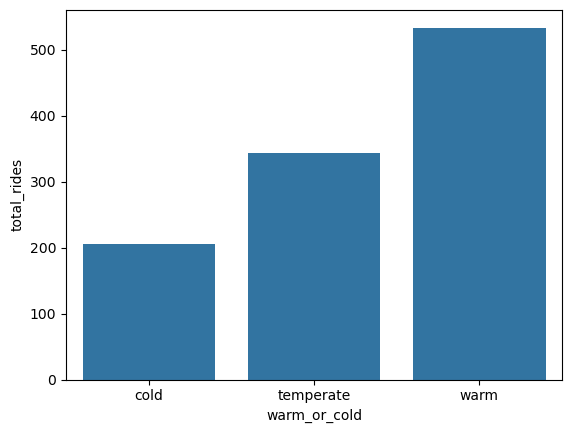

In [113]:
# group by year and calculate aggregate values (e.g., mean, sum)
rides_warmorcold = df_hourly.groupby(df_hourly["warm_or_cold"])["total_rides"].mean()


sns.barplot(rides_warmorcold)

In [114]:
#wet or dry days
#Hypothesis: On high humidity days, there is less usage

#Human comfort: In terms of human perception, high humidity can make conditions feel more uncomfortable. 
#According to How Does Relative Humidity Affect How I Feel Outside?, humans are sensitive to very high humidity, 
#and the skin relies on the air to get rid of moisture. 
#While there is no specific threshold mentioned, it’s implied that above-average humidity (likely above 70-80%) 
#could be considered “wet” or uncomfortable for humans.


df_hourly["wet_or_dry"] = df_hourly["relativehumidity_2m (%)"].apply(lambda value: "dry"
                                                                if value <= 60 else "moderate"
                                                                if value <= 85 else "wet"
                                                                ) 

df_hourly

,casual,date,hour,member,total_rides,relativehumidity_2m (%),temperature_2m (°c),weathercode (wmo code),windspeed_10m (km/h),warm_or_cold,weekday_name,daytime,percentage_members_vs_casuals(%),month,season,is_holiday,weather_description,weather_type,wet_or_dry
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,cold,Friday,morning,56.52,1,winter,True,Cloud generally dissolving or becoming less de...,Sunny,wet
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,cold,Friday,morning,50.00,1,winter,True,Cloud generally dissolving or becoming less de...,Sunny,wet
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,cold,Friday,morning,58.33,1,winter,True,State of sky on the whole unchanged,Sunny,wet
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,cold,Friday,morning,43.75,1,winter,True,State of sky on the whole unchanged,Sunny,moderate
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,cold,Friday,morning,41.67,1,winter,True,State of sky on the whole unchanged,Sunny,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3,cold,Sunday,afternoon_rush,59.01,12,winter,False,Cloud development not observed or not observable,Sunny,moderate
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7,cold,Sunday,evening,60.82,12,winter,False,Cloud development not observed or not observable,Sunny,moderate
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0,cold,Sunday,evening,61.99,12,winter,False,Cloud development not observed or not observable,Sunny,moderate
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7,cold,Sunday,evening,63.11,12,winter,False,Cloud development not observed or not observable,Sunny,moderate


In [115]:
#The National Weather Service (NWS) defines wind as “WINDY” when sustained winds reach 20 mph or more.
#According to the Beaufort Scale, hurricane warnings are issued when winds reach 12 on the scale, 
# but actual hurricane categories are determined by different factors.
#In terms of sustained wind speeds, the following ranges are considered:
# Windy: 20-30 mph
#Very windy: 30-40 mph
#Strong, dangerous, high, and damaging winds: 40-73 mph
#Hurricane-force winds: 74 mph or greater

df_hourly["windy_or_windstill"] = df_hourly["windspeed_10m (km/h)"].apply(lambda value: "wind_still"
                                                                if value <= 20 else "windy"
                                                                if value <= 30 else "very_windy"
                                                                ) 

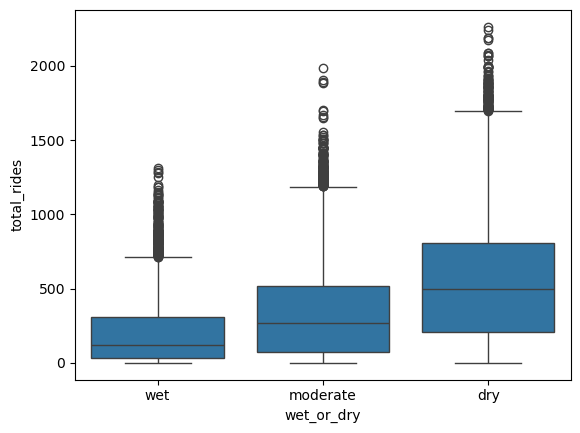

In [116]:
df_hourly_test = df_hourly

ax = sns.boxplot(data=df_hourly_test , x="wet_or_dry", y= "total_rides")


In [117]:
max_value = df_hourly['total_rides'].max()
print("This is the max amount of rides done in one hour: ",max_value)  # output: 5

min_value = df_hourly['total_rides'].min()
print("This is the least amount of rides done in one hour: ",min_value)  # output: 5

max_index = df_hourly['total_rides'].idxmax()
max_row = df_hourly.loc[max_index]
print(max_row)  # output: Series with values {'A': 5}

min_index = df_hourly['total_rides'].idxmin()
min_row = df_hourly.loc[min_index]
print(min_row)  # output: Series with values {'A': 5}


This is the max amount of rides done in one hour:  2262.0
This is the least amount of rides done in one hour:  1.0
casual                                                                         728.0
date                                                             2023-10-25 00:00:00
hour                                                                              17
member                                                                        1534.0
total_rides                                                                   2262.0
relativehumidity_2m (%)                                                           45
temperature_2m (°c)                                                              8.5
weathercode (wmo code)                                                             0
windspeed_10m (km/h)                                                             1.5
warm_or_cold                                                               temperate
weekday_name                       

<Axes: xlabel='is_holiday', ylabel='percentage_members_vs_casuals(%)'>

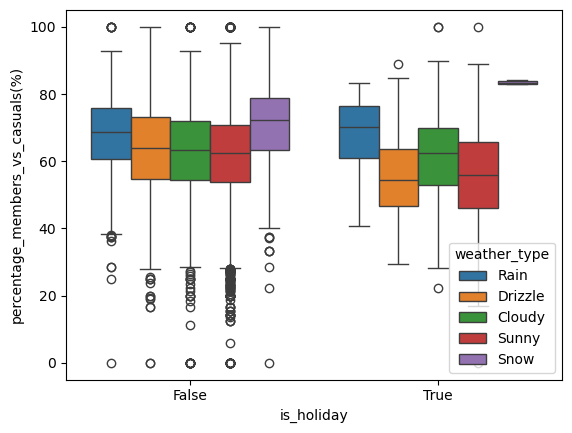

In [118]:
sns.boxplot(data=df_hourly, x="is_holiday", y="percentage_members_vs_casuals(%)", hue="weather_type")

<Axes: xlabel='weather_type', ylabel='total_rides'>

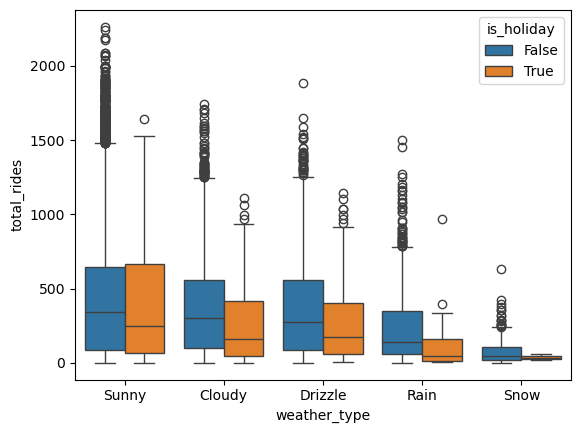

In [119]:
sns.boxplot(data=df_hourly, x="weather_type", y="total_rides", hue="is_holiday")

In [120]:
df_hourly['weekday_name'] = df_hourly['date'].dt.day_name()
df_hourly['is_weekend'] = df_hourly["date"].dt.weekday >= 5

In [121]:
df_hourly.head(2)

,casual,date,hour,member,total_rides,relativehumidity_2m (%),temperature_2m (°c),weathercode (wmo code),windspeed_10m (km/h),warm_or_cold,...,daytime,percentage_members_vs_casuals(%),month,season,is_holiday,weather_description,weather_type,wet_or_dry,windy_or_windstill,is_weekend
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,cold,...,morning,56.52,1,winter,True,Cloud generally dissolving or becoming less de...,Sunny,wet,wind_still,False
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,cold,...,morning,50.00,1,winter,True,Cloud generally dissolving or becoming less de...,Sunny,wet,wind_still,False


In [127]:
#Prepping dataframe for correlation map and machine learning
df_hourly['warm_or_cold'] = df_hourly['warm_or_cold'].replace({'cold': 0, 'temperate': 1, 'warm': 2})
df_hourly['daytime'] = df_hourly['daytime'].replace({"morning":0,"morning_rush":1,"midday":2,"afternoon_rush":3,"evening":4})
df_hourly["season"] = df_hourly["season"].replace({"spring":0,"summer":1,"fall":2,"winter":3})
df_hourly["weather_type"] = df_hourly["weather_type"].replace({"Sunny":0,"Cloudy":1,"Drizzle":2,"Rain":3,"Snow":4})



df_hourly['warm_or_cold'] = df_hourly['warm_or_cold'].astype(int) #might have to 
df_hourly['is_weekend'] = df_hourly['is_weekend'].astype(int)
df_hourly['is_holiday'] = df_hourly['is_holiday'].astype(int)
#clean data set so there are no string values
no_strings = df_hourly.drop(columns=["weather_type","weather_description","weekday_name",
                                    "casual","member","weekday_name","weather_type","wet_or_dry","windy_or_windstill"])
                            #variables that will give away the trend to the AI
                                #"casual"
                                #"member"
                                #"total_rides" ?

# specify the column to move (e.g., 'Age')
col_to_move = 'total_rides'

# pop the column from its original position
moved_col = no_strings.pop(col_to_move)

# insert the column at the last position (default is -1, which means the end)
no_strings.insert(len(no_strings.columns), col_to_move, moved_col)

no_strings.head(2)

,date,hour,relativehumidity_2m (%),temperature_2m (°c),weathercode (wmo code),windspeed_10m (km/h),warm_or_cold,daytime,percentage_members_vs_casuals(%),month,season,is_holiday,is_weekend,total_rides
0,2021-01-01,0,90,2.4,1,10.2,0,0,56.52,1,3,1,0,46.0
1,2021-01-01,1,88,1.8,1,10.0,0,0,50.00,1,3,1,0,46.0


In [ ]:
#To be changed, dropped etc
#"weathercode (wmo code)" (keep) x
#"warm_or_cold" (to int) x
#"weekday_name" (drop) x
#"daytime" (replace for ints?) x
#"month" (keep?) x
#"season" (replace for ints?) x
#"weather_description" (drop)
#"weather_type" (replace for ints?)
#"wet_or_dry" (replace for ints?/ fullfills same purpose as weather code right?? same as weather_type)
#"windy_or_windstill" (drop, same as wind speed)



SyntaxError: invalid syntax (350551350.py, line 2)

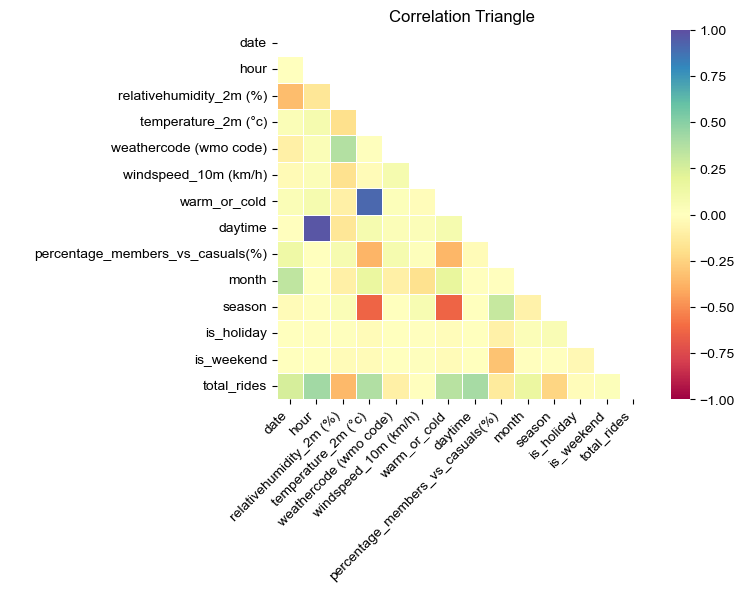

In [128]:
###Heat map for all data points to evaluate correlations 

#correlation map
corrmap = no_strings.corr()
# Generate a mask for the upper triangular part
mask = np.triu(np.ones_like(corrmap, dtype=bool))

#plot heatmap triangle 
ax = sns.heatmap(
    corrmap, mask = mask,
    vmin=-1, vmax=1, center=0,
    cmap="Spectral",
    square=True,
    linewidths=0.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title("Correlation Triangle")
sns.set(rc = {'figure.figsize':(15,8)})

In [ ]:
#corr heatmal EVAL
#it seems that windspeed is not correlated, same as holidays and weekends
#Will keep these features in for now, because plots suggested otherwise, since weekends contribute to
#the correlation between members vs casual users
